Hola **Enrique**!

Soy **Patricio Requena** 👋. Es un placer ser el revisor de tu proyecto el día de hoy!

Revisaré tu proyecto detenidamente con el objetivo de ayudarte a mejorar y perfeccionar tus habilidades. Durante mi revisión, identificaré áreas donde puedas hacer mejoras en tu código, señalando específicamente qué y cómo podrías ajustar para optimizar el rendimiento y la claridad de tu proyecto. Además, es importante para mí destacar los aspectos que has manejado excepcionalmente bien. Reconocer tus fortalezas te ayudará a entender qué técnicas y métodos están funcionando a tu favor y cómo puedes aplicarlos en futuras tareas. 

_**Recuerda que al final de este notebook encontrarás un comentario general de mi parte**_, empecemos!

Encontrarás mis comentarios dentro de cajas verdes, amarillas o rojas, ⚠️ **por favor, no muevas, modifiques o borres mis comentarios** ⚠️:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>
</div>

# PROYECTO FINAL.SPRINT 14.

## PRUEBA A/B

**Propósito de la prueba:**

Probar cambios relacionados con la introducción de un sistema de recomendaciones mejorado

**Descripcion tecnica a considerar**


- Nombre de la prueba: recommender_system_test
  
- Grupos: А (control), B (nuevo embudo de pago)
  
- Fecha de lanzamiento: 2020-12-07
  
- Fecha en la que dejaron de aceptar nuevos usuarios: 2020-12-21

- Fecha de finalización: 2021-01-01

- Audiencia: 15% de los nuevos usuarios de la región de la UE

Resultado esperado: dentro de los 14 días posteriores a la inscripción, los usuarios mostrarán una mejor conversión en vistas de la página del producto (el evento product_page), instancias de agregar artículos al carrito de compras (product_cart) y compras (purchase). En cada etapa del embudo product_page → product_cart → purchase, habrá al menos un 10% de aumento.

- Número previsto de participantes de la prueba: 6 000

## Descarga de librerias y datos

In [1]:
import pandas as pd
from scipy import stats as st
import numpy as np
import math as mth
import matplotlib.pyplot as plt
import datetime as dt
import matplotlib.dates as mdates
from datetime import datetime
import scipy.stats as stats
from scipy.stats import norm
from statsmodels.stats.proportion import proportions_ztest

In [2]:
df_marketing = pd.read_csv('/datasets/ab_project_marketing_events_us.csv') 
df_new_users = pd.read_csv('/datasets/final_ab_new_users_upd_us.csv')
df_events = pd.read_csv('/datasets/final_ab_events_upd_us.csv')
df_ab_participants = pd.read_csv('/datasets/final_ab_participants_upd_us.csv')

# Explorar datos

In [3]:
df_marketing.info()
df_new_users.info()
df_events.info()
df_ab_participants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   name       14 non-null     object
 1   regions    14 non-null     object
 2   start_dt   14 non-null     object
 3   finish_dt  14 non-null     object
dtypes: object(4)
memory usage: 576.0+ bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58703 entries, 0 to 58702
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     58703 non-null  object
 1   first_date  58703 non-null  object
 2   region      58703 non-null  object
 3   device      58703 non-null  object
dtypes: object(4)
memory usage: 1.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423761 entries, 0 to 423760
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   user_id     423761 non-null  obj

In [4]:
#revisar datos ausentes en df_events
df_events[df_events['details'].isna()].head(10)

,user_id,event_dt,event_name,details
60314,2E1BF1D4C37EA01F,2020-12-07 09:05:47,product_cart,NaN
60315,50734A22C0C63768,2020-12-07 13:24:03,product_cart,NaN
60316,5EB159DA9DC94DBA,2020-12-07 22:54:02,product_cart,NaN
60317,084A22B980BA8169,2020-12-07 15:25:55,product_cart,NaN
60318,0FC21E6F8FAA8DEC,2020-12-07 06:56:27,product_cart,NaN
60319,E6AF85675078215D,2020-12-07 16:23:47,product_cart,NaN
60320,831887FE7F2D6CBA,2020-12-07 06:50:30,product_cart,NaN
60321,AD8BFC204C0F14E4,2020-12-07 18:07:40,product_cart,NaN
60322,160121894010711F,2020-12-07 14:50:22,product_cart,NaN
60323,914FF952E23F1E75,2020-12-07 05:41:55,product_cart,NaN


**comentarios**

No se ven datos ausentes en la mayoria de los data frames, con excepcion de df_events, y al ver los datos, en la columna de details, que es donde se registran las compras de los usuarios, estos datos ausentes son compras no realizadas, por lo que rellenaremos con valos Cero.

Y ademas debemos cambiar tipos de datos en algunas columnas, principalmente en las de fechas.

In [5]:
df_events['details'] = df_events['details'].fillna(0)
df_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423761 entries, 0 to 423760
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   user_id     423761 non-null  object 
 1   event_dt    423761 non-null  object 
 2   event_name  423761 non-null  object 
 3   details     423761 non-null  float64
dtypes: float64(1), object(3)
memory usage: 12.9+ MB


In [6]:
df_marketing['start_dt'] = df_marketing['start_dt'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
df_marketing['finish_dt'] = df_marketing['finish_dt'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
df_new_users['first_date'] = df_new_users['first_date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
df_events['event_dt'] = pd.to_datetime(df_events['event_dt'], errors='coerce')

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy buen trabajo con la transformación de datos y la exploración inicial de los mismos, un dataset limpio es clave para una buena toma de decisiones en un experimento.
</div>

# Criterios para analizar los datos


Como tenemos registro de actividades de marketing, veremos si estas suceden en las mismas fechas de la prueba, y si es el caso, tendremos que omitir esos datos para evitar alteracion a los resultados.

La prueba fue realizada con audiencia de la UE, asi que debemos filtrar esos datos.

In [7]:
#ver datos de marketing
df_marketing.head(15)


,name,regions,start_dt,finish_dt
0,Christmas&New Year Promo,"EU, N.America",2020-12-25,2021-01-03
1,St. Valentine's Day Giveaway,"EU, CIS, APAC, N.America",2020-02-14,2020-02-16
2,St. Patric's Day Promo,"EU, N.America",2020-03-17,2020-03-19
3,Easter Promo,"EU, CIS, APAC, N.America",2020-04-12,2020-04-19
4,4th of July Promo,N.America,2020-07-04,2020-07-11
5,Black Friday Ads Campaign,"EU, CIS, APAC, N.America",2020-11-26,2020-12-01
6,Chinese New Year Promo,APAC,2020-01-25,2020-02-07
7,Labor day (May 1st) Ads Campaign,"EU, CIS, APAC",2020-05-01,2020-05-03
8,International Women's Day Promo,"EU, CIS, APAC",2020-03-08,2020-03-10
9,Victory Day CIS (May 9th) Event,CIS,2020-05-09,2020-05-11


In [8]:
df_marketing_filtrado = df_marketing[df_marketing['regions'] == 'EU']
df_marketing_eu = df_marketing[df_marketing['regions'].str.contains('EU', na=False)]
print('cantidad de campañas de marketing lanzadas en UE:', len(df_marketing_eu)) 


cantidad de campañas de marketing lanzadas en UE: 7


In [9]:
#revisar las campañas y sus fechas
df_marketing_eu.head(15)

,name,regions,start_dt,finish_dt
0,Christmas&New Year Promo,"EU, N.America",2020-12-25,2021-01-03
1,St. Valentine's Day Giveaway,"EU, CIS, APAC, N.America",2020-02-14,2020-02-16
2,St. Patric's Day Promo,"EU, N.America",2020-03-17,2020-03-19
3,Easter Promo,"EU, CIS, APAC, N.America",2020-04-12,2020-04-19
5,Black Friday Ads Campaign,"EU, CIS, APAC, N.America",2020-11-26,2020-12-01
7,Labor day (May 1st) Ads Campaign,"EU, CIS, APAC",2020-05-01,2020-05-03
8,International Women's Day Promo,"EU, CIS, APAC",2020-03-08,2020-03-10


**Comentario**

La unica campaña que se realizo durante las fechas que coinciden con nuestra prueba fue la de Christmas, que empezo el 25 de diciembre; por lo que es mejor no usar los datos a partir de ese dia para evitar sesgos.


veremos las fechas registradas de data frame de eventos

In [10]:
primer_dia_eventos = df_events['event_dt'].min()
ultimo_dia_eventos = df_events['event_dt'].max()

print('primer dia de evento regitrado:', primer_dia_eventos)
print()
print('ultmo dia de evento regitrado:', ultimo_dia_eventos)

primer dia de evento regitrado: 2020-12-07 00:00:33

ultmo dia de evento regitrado: 2020-12-30 23:36:33


vemos que el ultimo registro de eventos es el 30 de diciembre, y marketng lanzo una promocon a partir del 25 de diciembre, por lo que eliminaremos todos los datos despues de la fecha de la promocon de marketing, para evitar ruido en nuestra prueba.

In [11]:
#eliminar datos despues del 25 de diciembre
df_events_filtrado = df_events[df_events['event_dt'] <  '2020-12-25']

In [12]:
df_events_filtrado.head(20)

,user_id,event_dt,event_name,details
0,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.99
1,7B6452F081F49504,2020-12-07 09:22:53,purchase,9.99
2,9CD9F34546DF254C,2020-12-07 12:59:29,purchase,4.99
3,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99
4,1FD7660FDF94CA1F,2020-12-07 10:15:09,purchase,4.99
5,831887FE7F2D6CBA,2020-12-07 06:50:29,purchase,4.99
6,6B2F726BFD5F8220,2020-12-07 11:27:42,purchase,4.99
7,BEB37715AACF53B0,2020-12-07 04:26:15,purchase,4.99
8,B5FA27F582227197,2020-12-07 01:46:37,purchase,4.99
9,A92195E3CFB83DBD,2020-12-07 00:32:07,purchase,4.99


In [13]:
primer_dia_eventos2 = df_events_filtrado['event_dt'].min()
ultimo_dia_eventos2 = df_events_filtrado['event_dt'].max()

print('primer dia de evento regitrado:', primer_dia_eventos2)
print()
print('ultmo dia de evento regitrado:', ultimo_dia_eventos2)

primer dia de evento regitrado: 2020-12-07 00:00:33

ultmo dia de evento regitrado: 2020-12-24 23:59:58


### Ahora filtraremos los datos de "df_ab_participants"

en esta tabla se nos muestran los usuarios y los tipos de pruebas que se realizaron, en nuestro caso nos enfocaremos en la prueba "recommender_system_test" 


In [14]:
df_ab_participants = df_ab_participants[df_ab_participants['ab_test'] == 'recommender_system_test']

df_ab_participants.head(20)

,user_id,group,ab_test
0,D1ABA3E2887B6A73,A,recommender_system_test
1,A7A3664BD6242119,A,recommender_system_test
2,DABC14FDDFADD29E,A,recommender_system_test
3,04988C5DF189632E,A,recommender_system_test
4,4FF2998A348C484F,A,recommender_system_test
5,7473E0943673C09E,A,recommender_system_test
6,C46FE336D240A054,A,recommender_system_test
7,92CB588012C10D3D,A,recommender_system_test
8,B3A2485649E4A012,A,recommender_system_test
9,66FC298441D50783,A,recommender_system_test


### Ahora filtraremos los datos del dataframe "df_new_users" 

En esta tabla tenemos los nuevos usuarios que se registraron para la prueba, los filtraremos segun la region de la prueba, despues de mezclar los datos entre data frames.

Primero tenemos que mezclar los datos del dataframe "df_ab_participants" y "df_new_users"; para tener los usuarios registrados y que muestre grupo pertenecen de la prueba.

Luego podemos filtrar por la regon EU que es la que esta en el estudio de la prueba.

In [15]:
#mezclar dataframes
df_ab_participants2 = df_ab_participants.merge(
    df_new_users,
    on='user_id',
    how='left'
)

#filtrar dataframe por region EU
df_ab_participants2 = df_ab_participants2[df_ab_participants2['region'] == 'EU']
df_ab_participants2.head(20)

,user_id,group,ab_test,first_date,region,device
0,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07,EU,PC
1,A7A3664BD6242119,A,recommender_system_test,2020-12-20,EU,iPhone
2,DABC14FDDFADD29E,A,recommender_system_test,2020-12-08,EU,Mac
3,04988C5DF189632E,A,recommender_system_test,2020-12-14,EU,iPhone
4,4FF2998A348C484F,A,recommender_system_test,2020-12-20,EU,Mac
5,7473E0943673C09E,A,recommender_system_test,2020-12-16,EU,iPhone
6,C46FE336D240A054,A,recommender_system_test,2020-12-17,EU,iPhone
7,92CB588012C10D3D,A,recommender_system_test,2020-12-09,EU,PC
8,B3A2485649E4A012,A,recommender_system_test,2020-12-09,EU,iPhone
9,66FC298441D50783,A,recommender_system_test,2020-12-08,EU,iPhone


Revisar si hay usuarios en ambos grupos.

In [16]:
# Usuarios en grupo A
usuarios_A = set(df_ab_participants2[df_ab_participants2['group'] == 'A']['user_id'])

# Usuarios en grupo B
usuarios_B = set(df_ab_participants2[df_ab_participants2['group'] == 'B']['user_id'])

# Intersección: usuarios que están en ambos grupos
usuarios_en_ambos = usuarios_A.intersection(usuarios_B)

# Mostrar resultados
print(f"Número de usuarios en ambos grupos: {len(usuarios_en_ambos)}")

Número de usuarios en ambos grupos: 0


In [17]:
#ver cuantos usuarios hay en cada grupo
df_ab_participants2.groupby('group')['user_id'].nunique()

group
A    2604
B     877
Name: user_id, dtype: int64

In [18]:
df_events_filtrado.info()

df_events_filtrado.head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 376034 entries, 0 to 403184
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   user_id     376034 non-null  object        
 1   event_dt    376034 non-null  datetime64[ns]
 2   event_name  376034 non-null  object        
 3   details     376034 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 14.3+ MB


,user_id,event_dt,event_name,details
0,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.99
1,7B6452F081F49504,2020-12-07 09:22:53,purchase,9.99
2,9CD9F34546DF254C,2020-12-07 12:59:29,purchase,4.99
3,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99
4,1FD7660FDF94CA1F,2020-12-07 10:15:09,purchase,4.99
5,831887FE7F2D6CBA,2020-12-07 06:50:29,purchase,4.99
6,6B2F726BFD5F8220,2020-12-07 11:27:42,purchase,4.99
7,BEB37715AACF53B0,2020-12-07 04:26:15,purchase,4.99
8,B5FA27F582227197,2020-12-07 01:46:37,purchase,4.99
9,A92195E3CFB83DBD,2020-12-07 00:32:07,purchase,4.99


In [30]:
df_ab_participants2.info()
df_ab_participants2.head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3481 entries, 0 to 3480
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     3481 non-null   object        
 1   group       3481 non-null   object        
 2   ab_test     3481 non-null   object        
 3   first_date  3481 non-null   datetime64[ns]
 4   region      3481 non-null   object        
 5   device      3481 non-null   object        
dtypes: datetime64[ns](1), object(5)
memory usage: 190.4+ KB


,user_id,group,ab_test,first_date,region,device
0,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07,EU,PC
1,A7A3664BD6242119,A,recommender_system_test,2020-12-20,EU,iPhone
2,DABC14FDDFADD29E,A,recommender_system_test,2020-12-08,EU,Mac
3,04988C5DF189632E,A,recommender_system_test,2020-12-14,EU,iPhone
4,4FF2998A348C484F,A,recommender_system_test,2020-12-20,EU,Mac
5,7473E0943673C09E,A,recommender_system_test,2020-12-16,EU,iPhone
6,C46FE336D240A054,A,recommender_system_test,2020-12-17,EU,iPhone
7,92CB588012C10D3D,A,recommender_system_test,2020-12-09,EU,PC
8,B3A2485649E4A012,A,recommender_system_test,2020-12-09,EU,iPhone
9,66FC298441D50783,A,recommender_system_test,2020-12-08,EU,iPhone


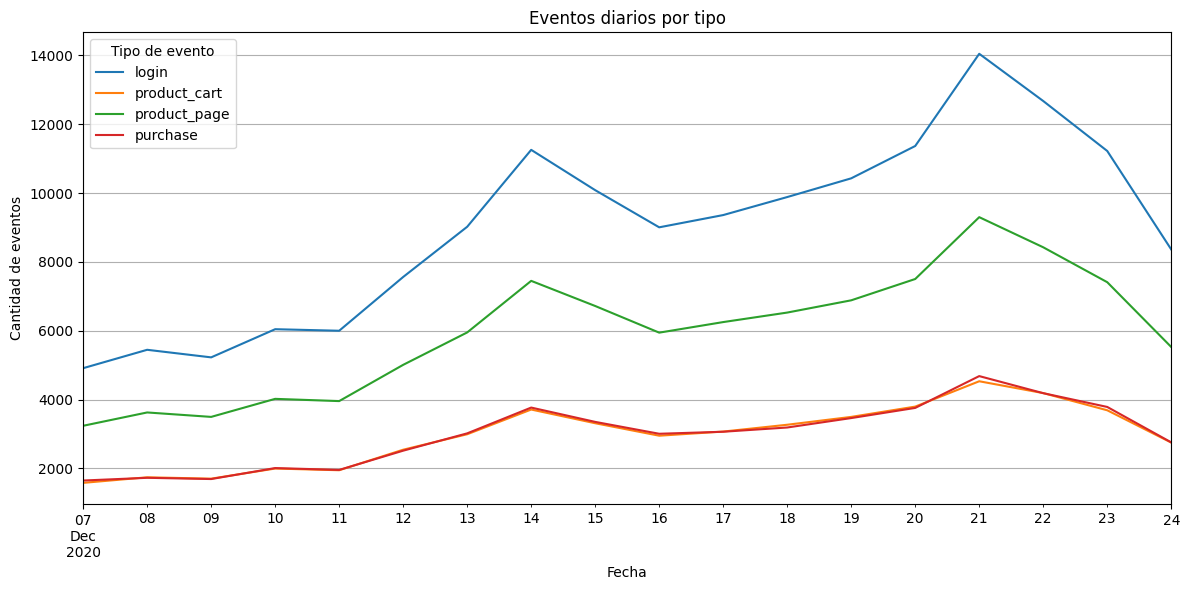

In [34]:
#Graficar la cantidad de eventos por dia por cada evento registrado
eventos_por_dia_tipo = df_events_filtrado.groupby(['event_dt', 'event_name']).size().unstack(fill_value=0)

eventos_por_dia_tipo.plot(figsize=(12, 6))
plt.title('Eventos diarios por tipo')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de eventos')
plt.legend(title='Tipo de evento')
plt.grid(True)
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

No se ha hecho el análisis para ver la distribución de eventos a lo largo del tiempo
</div>

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante (1ra Iteracion)</b> <a class=“tocSkip”></a>
    
Ya se agrego la grafica para ver la distribucion de los eventos durante los dias de la prueba.
</div>

In [35]:
# Normalizar a fecha sin hora (solo año-mes-día)
df_events_filtrado = df_events_filtrado.copy()
df_events_filtrado.loc[:, 'event_dt'] = df_events_filtrado['event_dt'].dt.floor('D')
df_ab_participants2.loc[:, 'first_date'] = df_ab_participants2['first_date'].dt.floor('D')

# 1. Hacer merge para juntar eventos con info de usuario y grupo
df_merged = df_events_filtrado.merge(
    df_ab_participants2[['user_id', 'group', 'first_date']],
    on='user_id',
    how='inner'
)

# 2. Calcular días desde inscripción al evento
df_merged['days_since_signup'] = (df_merged['event_dt'] - df_merged['first_date']).dt.days

# 3. Filtrar eventos ocurridos dentro de los primeros 14 días (inclusive)
df_14d = df_merged[(df_merged['days_since_signup'] >= 0) & (df_merged['days_since_signup'] <= 14)]

# 4. Filtrar solo eventos relevantes del embudo
eventos_embudo = ['product_page', 'product_cart', 'purchase']
df_embudo = df_14d[df_14d['event_name'].isin(eventos_embudo)]

# 5. Contar usuarios únicos por grupo y tipo de evento (usuarios que hicieron al menos un evento)
usuarios_por_evento = (
    df_embudo.drop_duplicates(subset=['user_id', 'group', 'event_name'])
    .groupby(['group', 'event_name'])['user_id']
    .nunique()
    .reset_index()
)

# 6. Contar total usuarios por grupo (para calcular tasa)
usuarios_totales = (
    df_ab_participants2.groupby('group')['user_id']
    .nunique()
    .reset_index(name='total_users')
)

# 7. Unir para calcular tasa de conversión
df_conversion = usuarios_por_evento.merge(usuarios_totales, on='group')
df_conversion['conversion_rate'] = df_conversion['user_id'] / df_conversion['total_users']

# 8. Pivotar para comparar grupos
conversion_pivot = df_conversion.pivot(index='event_name', columns='group', values='conversion_rate')

# 9. Calcular mejora porcentual del grupo B respecto al A
conversion_pivot['improvement_%'] = ((conversion_pivot['B'] - conversion_pivot['A']) / conversion_pivot['A']) * 100

# 10. Mostrar resultados
print(conversion_pivot)

group                A         B  improvement_%
event_name                                     
product_cart  0.300307  0.278221      -7.354472
product_page  0.647081  0.562144     -13.126284
purchase      0.319892  0.283922     -11.244407


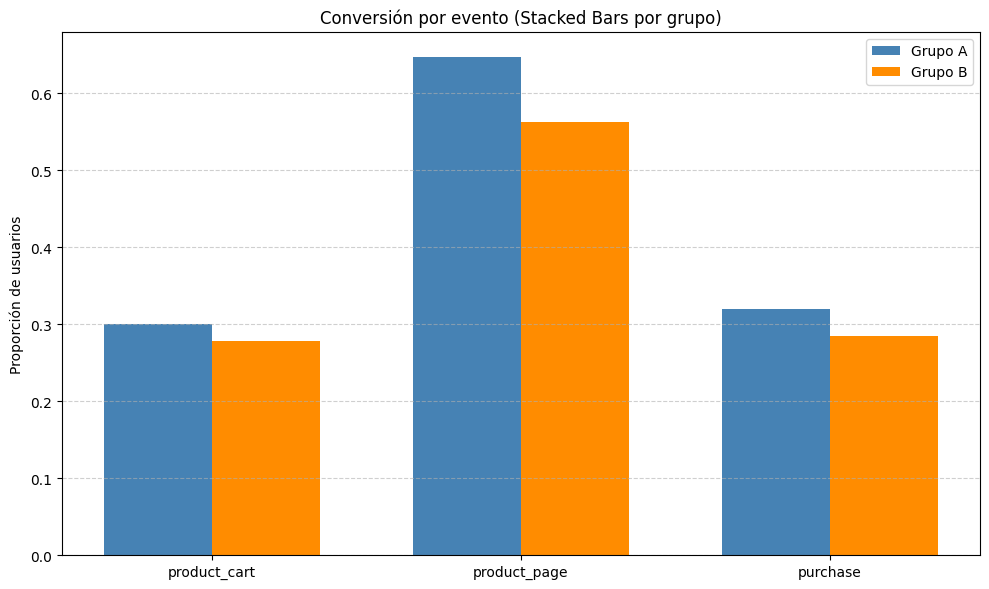

In [38]:
# Configurar gráfico
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35
x = range(len(df_plot.index))
eventos = df_plot.index

# Graficar grupo A
ax.bar([i - bar_width/2 for i in x], df_plot['A'], width=bar_width, label='Grupo A', color='steelblue')

# Graficar grupo B
ax.bar([i + bar_width/2 for i in x], df_plot['B'], width=bar_width, label='Grupo B', color='darkorange')

# Personalización
ax.set_xticks(x)
ax.set_xticklabels(eventos)
ax.set_ylabel('Proporción de usuarios')
ax.set_title('Conversión por evento (Stacked Bars por grupo)')
ax.legend(loc='upper right')
ax.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

Debido a que los datos del grupo de control (grupo A)  son mucho mayores a los datos del grupo de prueba, es posible que directamente no parezca haber alguna mejora con la implementacion, asi que realizaremos otra prueba, usando el metodo de proporciones.

<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Podrías complementar esto con una gráfica de barras en stack para que se muestre por cada evento 2 barras (una por grupo) mostrando la diferencia de proporción o conversión
</div>

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante (1ra Iteracion)</b> <a class=“tocSkip”></a>

Se agrego la grafica de barras para poder visualizar de mejor forma la comparacion entre el resultado de ambos grupos durante la prueba.    
</div>

### Pruebas de hipotesis

Las hipotesis nulas son: no existe diferencia significativa en las proporciones de las pruebas A/B para los eventos de "product_page",  "product_cart" y "purchase"

In [21]:
#contar cuantos datos hay para cada evento
evento = 'product_page'

successes_A = usuarios_por_evento.loc[
    (usuarios_por_evento['group'] == 'A') & (usuarios_por_evento['event_name'] == evento), 'user_id'
].values
successes_B = usuarios_por_evento.loc[
    (usuarios_por_evento['group'] == 'B') & (usuarios_por_evento['event_name'] == evento), 'user_id'
].values

successes_A = int(successes_A[0]) if len(successes_A) > 0 else 0
successes_B = int(successes_B[0]) if len(successes_B) > 0 else 0

trials_A = usuarios_totales.loc[usuarios_totales['group'] == 'A', 'total_users'].values[0]
trials_B = usuarios_totales.loc[usuarios_totales['group'] == 'B', 'total_users'].values[0]

print(f"{evento} - Grupo A: {successes_A} éxitos de {trials_A} pruebas")
print(f"{evento} - Grupo B: {successes_B} éxitos de {trials_B} pruebas")

product_page - Grupo A: 1685 éxitos de 2604 pruebas
product_page - Grupo B: 493 éxitos de 877 pruebas


In [22]:
alpha = 0.05  # nivel de significación

successes = np.array([successes_A, successes_B])  # éxitos en grupo 1 y 2
trials = np.array([trials_A, trials_B])    # total de ensayos en grupo 1 y 2

# proporción de éxito en cada grupo
p1 = successes[0] / trials[0]
p2 = successes[1] / trials[1]

# proporción combinada
p_combined = (successes[0] + successes[1]) / (trials[0] + trials[1])

# diferencia de proporciones
difference = p1 - p2

# cálculo del error estándar
se = np.sqrt(p_combined * (1 - p_combined) * (1/trials[0] + 1/trials[1]))

# estadístico z
z_stat = difference / se

# p-valor para prueba bilateral
p_value = 2 * (1 - norm.cdf(abs(z_stat)))

print(f"Proporción grupo 1: {p1:.4f}")
print(f"Proporción grupo 2: {p2:.4f}")
print(f"Diferencia: {difference:.4f}")
print(f"Z estadístico: {z_stat:.4f}")
print(f"P-valor: {p_value:.6f}")

if p_value < alpha:
    print("Resultado significativo: rechazamos la hipótesis nula (hay diferencia)")
else:
    print("Resultado NO significativo: no rechazamos la hipótesis nula (no hay diferencia)")

Proporción grupo 1: 0.6471
Proporción grupo 2: 0.5621
Diferencia: 0.0849
Z estadístico: 4.4954
P-valor: 0.000007
Resultado significativo: rechazamos la hipótesis nula (hay diferencia)


<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

No deberías generar datos por tu cuenta, las variables que estás utilizando para comparar deberían ser obtenidas a partir de los cálculos realizados sobre los dataframe originales. Si escribes manualmente los datos puedes caer en errores de escritura que pueden llevarte a una conclusión incorrecta del análisis
</div>

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante (1ra Iteracion)</b> <a class=“tocSkip”></a>
    
   Tiene razon, puse manualmente los numeros que me salieron de un calculo anterior; ya corregi ese detalle y puse la variable donde se guarda ese numero obtenido de los calculos; repeti la modificacion en los siguientes calculos pues hice lo mismo para el analisis de los 3 eventos.
</div>

### analisis para evento 'product_cart'

In [23]:
#contar cuantos datos hay para cada evento
evento2 = 'product_cart'

successes_A2 = usuarios_por_evento.loc[
    (usuarios_por_evento['group'] == 'A') & (usuarios_por_evento['event_name'] == evento2), 'user_id'
].values
successes_B2 = usuarios_por_evento.loc[
    (usuarios_por_evento['group'] == 'B') & (usuarios_por_evento['event_name'] == evento2), 'user_id'
].values

successes_A2 = int(successes_A2[0]) if len(successes_A2) > 0 else 0
successes_B2 = int(successes_B2[0]) if len(successes_B2) > 0 else 0

trials_A2 = usuarios_totales.loc[usuarios_totales['group'] == 'A', 'total_users'].values[0]
trials_B2 = usuarios_totales.loc[usuarios_totales['group'] == 'B', 'total_users'].values[0]

print(f"{evento2} - Grupo A: {successes_A2} éxitos de {trials_A2} pruebas")
print(f"{evento2} - Grupo B: {successes_B2} éxitos de {trials_B2} pruebas")

product_cart - Grupo A: 782 éxitos de 2604 pruebas
product_cart - Grupo B: 244 éxitos de 877 pruebas


In [24]:
alpha = 0.05  # nivel de significación

successes2 = np.array([successes_A2, successes_B2])  # éxitos en grupo 1 y 2
trials2 = np.array([trials_A2, trials_B2])    # total de ensayos en grupo 1 y 2

# proporción de éxito en cada grupo
p3 = successes2[0] / trials2[0]
p4 = successes2[1] / trials2[1]

# proporción combinada
p_combined2 = (successes2[0] + successes2[1]) / (trials2[0] + trials2[1])

# diferencia de proporciones
difference2 = p3 - p4

# cálculo del error estándar
se2 = np.sqrt(p_combined2 * (1 - p_combined2) * (1/trials2[0] + 1/trials2[1]))

# estadístico z
z_stat2 = difference2 / se2

# p-valor para prueba bilateral
p_value2 = 2 * (1 - norm.cdf(abs(z_stat2)))

print(f"Proporción grupo 1: {p3:.4f}")
print(f"Proporción grupo 2: {p4:.4f}")
print(f"Diferencia: {difference2:.4f}")
print(f"Z estadístico: {z_stat2:.4f}")
print(f"P-valor: {p_value2:.6f}")

if p_value2 < alpha:
    print("Resultado significativo: rechazamos la hipótesis nula (hay diferencia)")
else:
    print("Resultado NO significativo: no rechazamos la hipótesis nula (no hay diferencia)")

Proporción grupo 1: 0.3003
Proporción grupo 2: 0.2782
Diferencia: 0.0221
Z estadístico: 1.2408
P-valor: 0.214692
Resultado NO significativo: no rechazamos la hipótesis nula (no hay diferencia)


### analisis para evento 'purchase'

In [25]:
#contar cuantos datos hay para cada evento
evento3 = 'purchase'

successes_A3 = usuarios_por_evento.loc[
    (usuarios_por_evento['group'] == 'A') & (usuarios_por_evento['event_name'] == evento3), 'user_id'
].values
successes_B3 = usuarios_por_evento.loc[
    (usuarios_por_evento['group'] == 'B') & (usuarios_por_evento['event_name'] == evento3), 'user_id'
].values

successes_A3 = int(successes_A3[0]) if len(successes_A3) > 0 else 0
successes_B3 = int(successes_B3[0]) if len(successes_B3) > 0 else 0

trials_A3 = usuarios_totales.loc[usuarios_totales['group'] == 'A', 'total_users'].values[0]
trials_B3 = usuarios_totales.loc[usuarios_totales['group'] == 'B', 'total_users'].values[0]

print(f"{evento3} - Grupo A: {successes_A3} éxitos de {trials_A3} pruebas")
print(f"{evento3} - Grupo B: {successes_B3} éxitos de {trials_B3} pruebas")

purchase - Grupo A: 833 éxitos de 2604 pruebas
purchase - Grupo B: 249 éxitos de 877 pruebas


In [26]:
alpha = 0.05  # nivel de significación

successes3 = np.array([successes_A3, successes_B3])  # éxitos en grupo 1 y 2
trials3 = np.array([trials_A3, trials_B3])    # total de ensayos en grupo 1 y 2

# proporción de éxito en cada grupo
p5 = successes3[0] / trials3[0]
p6 = successes3[1] / trials3[1]

# proporción combinada (pool)
p_combined3 = (successes3[0] + successes3[1]) / (trials3[0] + trials3[1])

# diferencia de proporciones
difference3 = p5 - p6

# cálculo del error estándar
se3 = np.sqrt(p_combined3 * (1 - p_combined3) * (1/trials3[0] + 1/trials3[1]))

# estadístico z
z_stat3 = difference3 / se3

# p-valor para prueba bilateral
p_value3 = 2 * (1 - norm.cdf(abs(z_stat3)))

print(f"Proporción grupo 1: {p5:.4f}")
print(f"Proporción grupo 2: {p6:.4f}")
print(f"Diferencia: {difference3:.4f}")
print(f"Z estadístico: {z_stat3:.4f}")
print(f"P-valor: {p_value3:.6f}")

if p_value3 < alpha:
    print("Resultado significativo: rechazamos la hipótesis nula (hay diferencia)")
else:
    print("Resultado NO significativo: no rechazamos la hipótesis nula (no hay diferencia)")

Proporción grupo 1: 0.3199
Proporción grupo 2: 0.2839
Diferencia: 0.0360
Z estadístico: 1.9906
P-valor: 0.046525
Resultado significativo: rechazamos la hipótesis nula (hay diferencia)


##CONCLUSIONES

Se tuvieron que hacer varios filtros en los dataframes para poder dejar datos que se pudieran usar para el analisis del exito o no de la prueba A/B de "recommender_system_test".

Como el departamento de marketing tambien hizo promociones en fechas similares, ignoramos los  datos que se generaron en las mismas fechas, que fue en Christmas a partir del 25 de diciembre.

Luego filtramos por region, ya que la indicacion fue que se hiciera con datos de la Union Europea.

Despues unimos tablas para poder ver todos los usuarios junto con los grupos de prueba a los que estaban asignados, y poder identificar si habia algun usuario que estuviera en ambas pruebas, lo cual no sucedio; pero lo que si se observo es que los datos en el grupo A de control eran mucho mas en cantidad que los registrados en el grupo B; esto, en primera instancia mostro resultados negativos en si hubo mejoria con la nueva implementacion, entonces, el objetivo inicial de ver un incremento del 10% en cada etapa no se pudo ver directamente, por lo que se decidio realizar analisis usando el metodo de proporciones, y ver si de este modo se puede identificar una diferencia singificativa estadisticamente y que si la prueba hubiera durado mas o generado mas datos, entonces si habria sido un exito y logrado el porcentaje deseado de aumento.


Y de este modo, analizando por separado cada etapa del embudo pudimos ver que en la primer etapa de vistas de la página del producto (el evento product_page), si hubo una diferencia significatva entre las poblaciones.

para la segunda etapa de instancias de agregar artículos al carrito de compras (product_cart), No se vio una diferencia significativa.

Y para la tercera etapa de compras (purchase), si se vio una diferencia estadisticamente significativa en las proporciones.

Y ya que en la etapa de generacion de ingresos economicos se vio una diferencia estadistica significativa, entonces se determina que la prueba es positiva y el sistema de recomedaciones mejorado impacta positivamente en el comportamiento de los usuarios.